# 작업스케쥴러
- Windows OS 에서 사용
- GUI 환경 제공
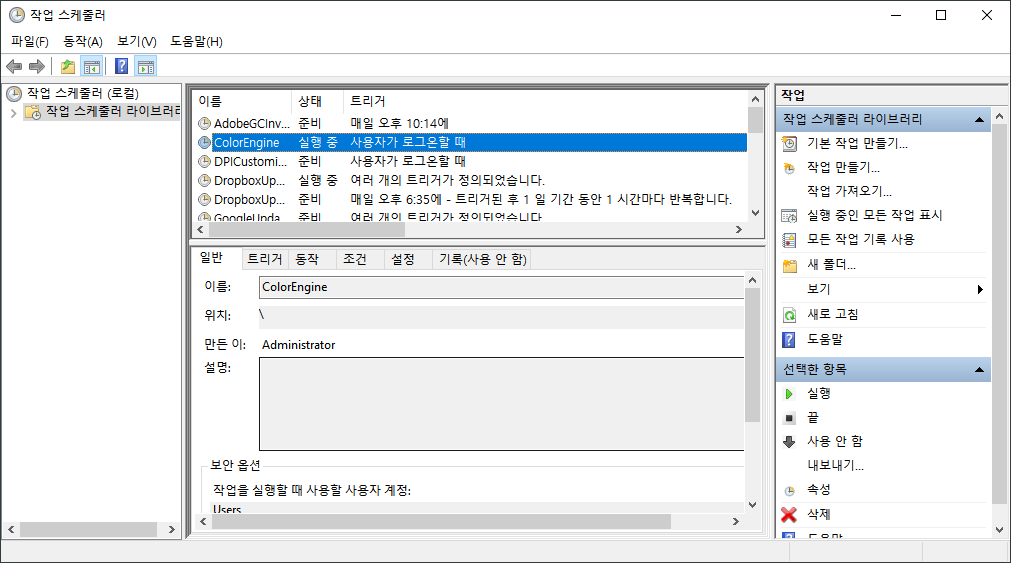

# 윈도우 스케쥴러 실습
- *.py 파이썬 파일 준비
- 동작 확인하기
- Windwos Scheduler 에 등록

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pymysql
import pymysql.cursors 
import time

crawlDate = time.strftime('%Y-%m-%d %H:%M:%S')
print('크롤링 :', crawlDate)

url = "https://www.naver.com"
response = requests.get(url)
dom = BeautifulSoup(response.text, "html.parser")
elements = dom.select("#yna_rolling .issue")

result = [
    {
        "뉴스" : element.text.strip(),
        "URL" : element.attrs['href'].strip()
    }    
    for element in elements
]

print(result)

df = pd.DataFrame([], columns=['뉴스', 'URL'])
for data in result:
    df.loc[len(df)] = data

conn = pymysql.connect(host='localhost',
        user='myuser',
        password='1234',
        database='mydb')

# prepares statement 방식
try:
    with conn.cursor() as cursor:
        sql = 'INSERT INTO NAVER_NEWS_ISSUE(news, url, crawlDate) VALUES (%s, %s, %s)'
        
        for news_issue in result:
            cursor.execute(sql, (news_issue['뉴스'], news_issue['URL'], crawlDate))

    conn.commit()
    print('DB 에 저장했습니다')

# pymysql 을 다룰때 자주 등장하는 Error 들.
except (pymysql.err.OperationalError, pymysql.ProgrammingError, 
        pymysql.InternalError, pymysql.IntegrityError) as e:
    print(e.args)
    print("mysql에러코드:", e.args[0])  # MySQL 에러코드
    print("mysql에러메세지:", e.args[1])  # MySQL 에러 메세지

finally:
    conn.close()


크롤링 : 2021-05-31 10:39:49
[{'뉴스': '신규확진 430명, 휴일영향 이틀째 400명대…63일만에 최소', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012426294'}, {'뉴스': '與, 김오수 청문보고서 단독 채택…野 "국민 무시"', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012426508'}, {'뉴스': '반도체 주춤하자 4월 생산 1.1%↓…소비·서비스는 역대 최대', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012426376'}, {'뉴스': '나경원 "유승민만 경선열차에" 이준석 "그럴 힘 있으면 옛날에"', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012426500'}, {'뉴스': '\'조국의 시간\' 맞은 與 혼선 …"반격의 칼" vs "당혹·난처"', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012426434'}, {'뉴스': '수도권 평균 아파트값 7억원 눈앞…9개월 만에 1억원 올라', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isY

#### 동작 확인해보기

>**python naver_news_issue.py**<br>
>크롤링 : 2021-05-29 22:16:23<br>
>[{'뉴스': '문대통령 "탄소중립, 못해낼 것 없다…선도국가 도약 기회"', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012424405'}, {'뉴스': '손정민 친구 A측 "8시간 블랙아웃"…유족 의혹 해명', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012424364'}, {'뉴스': '오후 9시까지 449명, 어제보다 44명↓…30일 500명 안팎 예상', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012424571'}, {'뉴스': '문대통령 "백신접종 속도 붙었다…매우 다행"', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012424269'}, {'뉴스': '"텃밭에 달렸다"…野당권주자들 주말 \'당심잡기\' 행보', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012424351'}, {'뉴스': '이낙연, 전남지 지모임 발족…정세균, 반도체·백신 챙기기', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012424470'}, {'뉴스': "'기본소득 이재명'-'안심소득 오세훈' 연일 날선 공방", 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012424594'}, {'뉴스': "서초서, '이용구 확인' 뒤 서울청에 하루 3차례 보고", 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012424228'}, {'뉴스': '류현진, 클리블랜드 악천후 뚫고 5이닝 2실점…시즌 5승 달성', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012424239'}, {'뉴스': '춘천서 여고생·30대 男 차에서 숨진 채 발견', 'URL': 'http://news.naver.com/main/list.nhn?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y&aid=0012424365'}] <br>
>DB 에 저장했습니다

- 파이썬 설치 경로 확인하기. 커맨드 창에서 확인하기
>**where python**
>>C:\ProgramData\Anaconda3\python.exe
>>C:\Users\frogt\AppData\Local\Microsoft\WindowsApps\python.exe


pythonw.exe 사용
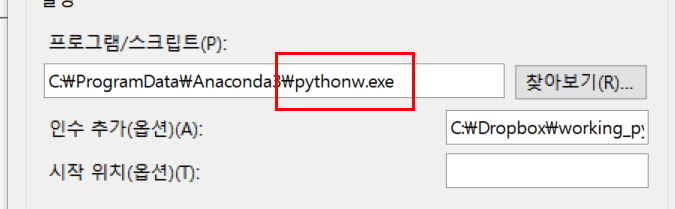

- 인수 추가 
    - C:\Dropbox\working_python_lecture\031_crawl\자동크롤러\naver_news_issue.py

#### 작업스케쥴러 시작하자 마자 한번 수행했다. 확인해보자
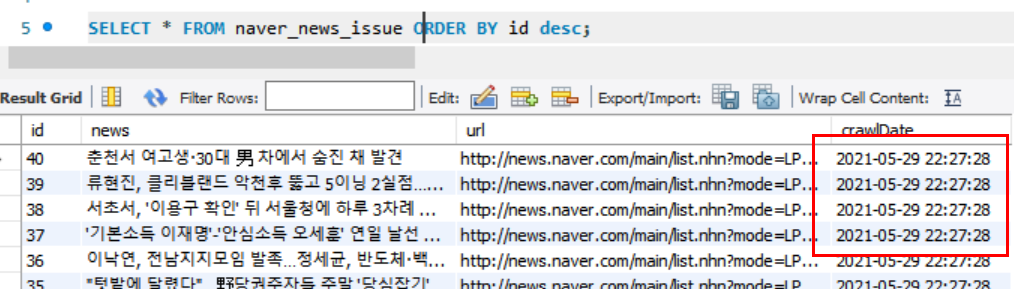

#### 5분뒤에 다시 보자
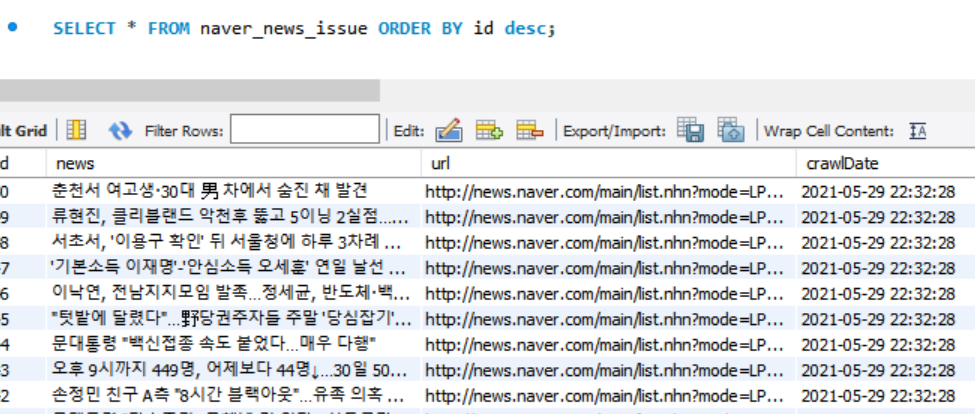